# Data Colelction

##### importing the required modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Converting the given dataset into a dataframe

In [ ]:
sales=pd.read_csv('Advertising.csv')
sales

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Data Cleaning

##### Removing the unnecessary columns

In [ ]:
sales.drop('Unnamed: 0',axis=1,inplace=True)
sales

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


##### Checking for NULL values

In [ ]:
sales.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


# Data Visualization

***We can see that Newspaper isn't contributing much to sales so we can remove the newspaper column***

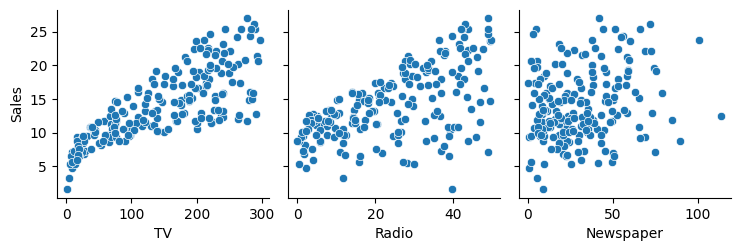

In [ ]:
sns.pairplot(sales,y_vars='Sales',x_vars=['TV', 'Radio', 'Newspaper'])

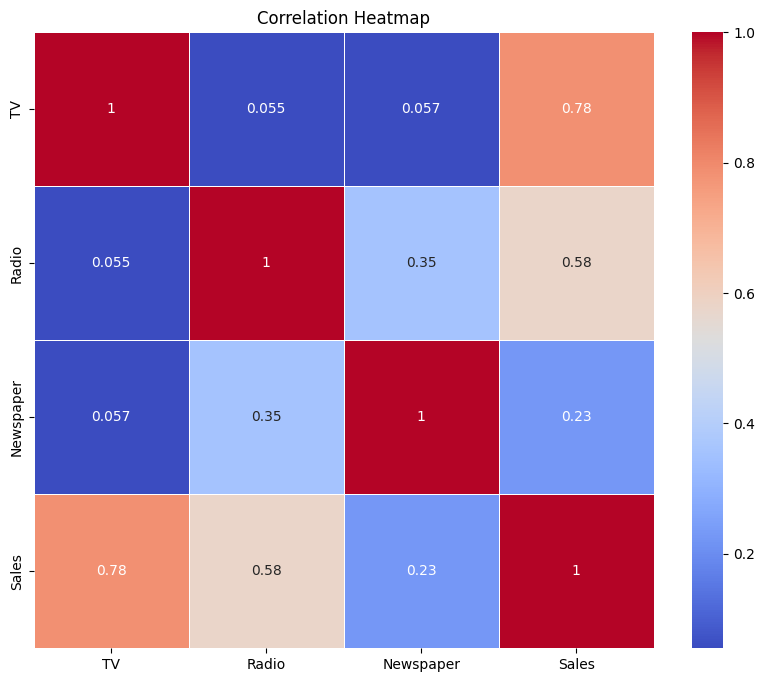

In [ ]:
corr_matrix =sales.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Data Preparation

##### Taking the independent and dependent columns as x and y respectively

In [ ]:
X=sales.drop(['Sales','Newspaper'],axis=1)
y=sales['Sales']

##### Splitting the dataset into training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Model Training

##### We are using polynomial regression for model training
***99% accuracy model***

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model.fit(X_train, y_train)
poly_model.score(X_test,y_test)

0.994338083561926

#Model Evaluation

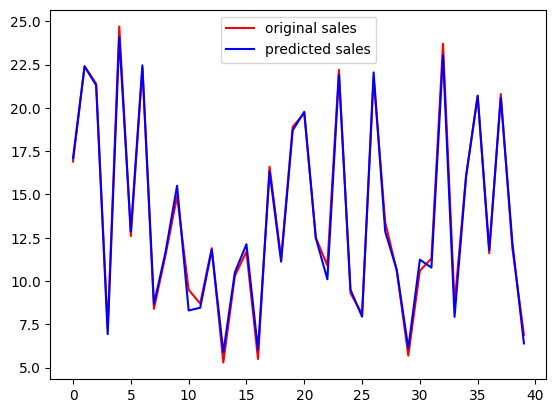

In [ ]:
y_pred=poly_model.predict(X_test)
x=np.arange(len(y_pred))
plt.plot(x,y_test,color='red',label='original sales')
plt.plot(x,y_pred,color='blue',label='predicted sales')
plt.legend()
plt.show()